## EDA (Customer Personality Analysis)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('customer_data.csv',sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### As null values less as compared to dataset so we can delete it 

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [8]:
for column in df.columns:
    if df[column].dtype=="O":
        print(df[column].value_counts())

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2014-05-09     1
2013-06-26     1
2014-01-09     1
Name: Dt_Customer, Length: 662, dtype: int64


In [9]:
# Renaming categories of Education
df['Education'] = df['Education'].str.replace('2n Cycle', 'Master')

In [10]:
df['Education'].value_counts()

Graduation    1116
Master         565
PhD            481
Basic           54
Name: Education, dtype: int64

In [11]:
# Rename values in Marital_status 
df['Marital_Status'] = df['Marital_Status'].str.replace('Together','Married')
df['Marital_Status'] = df['Marital_Status'].str.replace('Divorced','Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Widow','Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Absurd','Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Alone','Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('YOLO','Single')

In [12]:
df['Marital_Status'].value_counts()

Married    1430
Single      786
Name: Marital_Status, dtype: int64

In [ ]:
# Convert Dt_Customer column into datatime format 
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],format ="%d-%m-%Y")

In [14]:
print(f"Last Purchased year {df['Dt_Customer'].max()}")

Last Purchased year 2014-06-29


In [15]:
# Convert columns kidhome and Teenhom into Children
#Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] =2015 - df['Year_Birth']

In [16]:
# Create total spending column
df['TotalSpend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']

In [17]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,TotalSpend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,0,58,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2,61,27
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,0,50,776
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,1,31,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,1,34,422


In [18]:
# Drop coulumns
cols = ['ID',"Kidhome","Teenhome",'MntWines','MntFruits',
           'MntMeatProducts','MntFishProducts',
           'MntSweetProducts','MntGoldProds','Year_Birth']

df.drop(columns=cols, inplace =True)

In [19]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,TotalSpend
0,Graduation,Single,58138.0,2012-09-04,58,3,8,10,4,7,...,0,0,0,0,3,11,1,0,58,1617
1,Graduation,Single,46344.0,2014-03-08,38,2,1,1,2,5,...,0,0,0,0,3,11,0,2,61,27
2,Graduation,Married,71613.0,2013-08-21,26,1,8,2,10,4,...,0,0,0,0,3,11,0,0,50,776
3,Graduation,Married,26646.0,2014-02-10,26,2,2,0,4,6,...,0,0,0,0,3,11,0,1,31,53
4,PhD,Married,58293.0,2014-01-19,94,5,5,3,6,5,...,0,0,0,0,3,11,0,1,34,422


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.0,99.0
NumDealsPurchases,2216.0,2.323556,1.923716,0.0,1.0,2.0,3.0,15.0
NumWebPurchases,2216.0,4.085289,2.740951,0.0,2.0,4.0,6.0,27.0
NumCatalogPurchases,2216.0,2.671029,2.926734,0.0,0.0,2.0,4.0,28.0
NumStorePurchases,2216.0,5.800993,3.250785,0.0,3.0,5.0,8.0,13.0
NumWebVisitsMonth,2216.0,5.319043,2.425359,0.0,3.0,6.0,7.0,20.0
AcceptedCmp3,2216.0,0.073556,0.261106,0.0,0.0,0.0,0.0,1.0
AcceptedCmp4,2216.0,0.074007,0.261842,0.0,0.0,0.0,0.0,1.0
AcceptedCmp5,2216.0,0.073105,0.260367,0.0,0.0,0.0,0.0,1.0


#### We can observe the outliers in Income feature as 75% of data lies below 68522 and max is 666666
#### In Age max Value is 122 this is outlier

<Axes: >

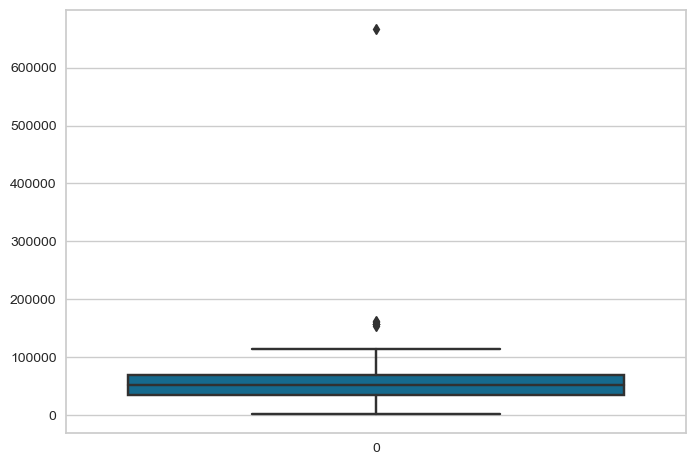

In [21]:
sns.boxplot(df['Income'])

<Axes: >

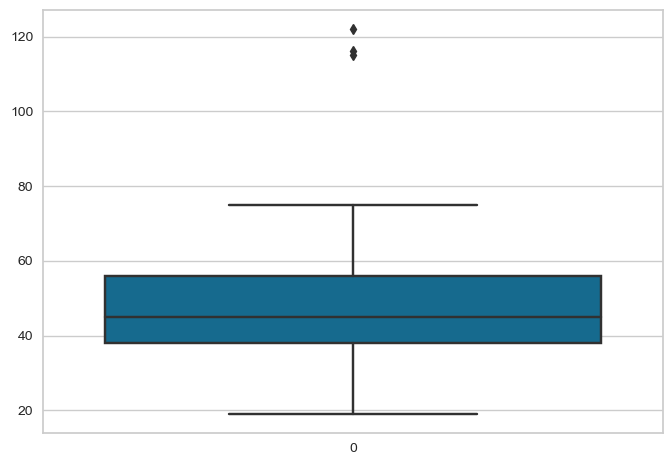

In [22]:
sns.boxplot(df['Age'])

In [23]:
#drop outliers from income and Age :

df = df[df['Age'] < 100]
df = df[df['Income'] < 110000]

<Axes: >

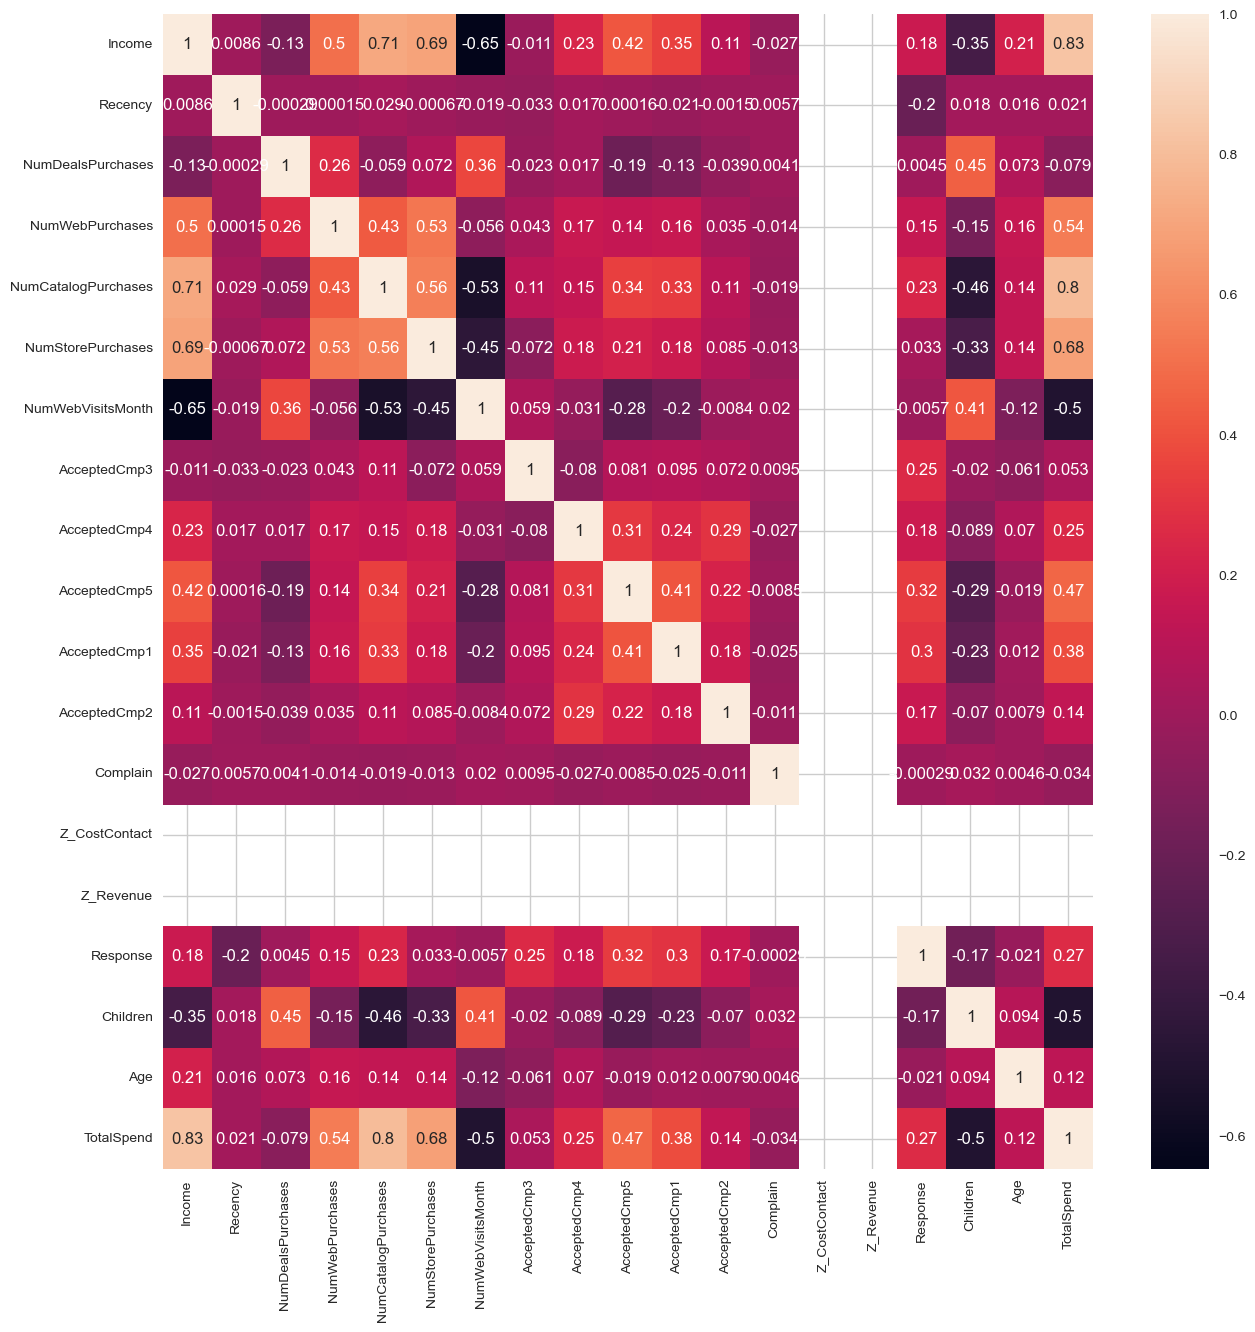

In [24]:
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr,annot=True)

In [25]:
df['Z_CostContact'].value_counts()

3    2204
Name: Z_CostContact, dtype: int64

- There is no relation of Z_costcontact and Z_response due to constant value
- Age and Recency have list correlation with other
- Total spending has highest correlation

<Axes: xlabel='Age', ylabel='Count'>

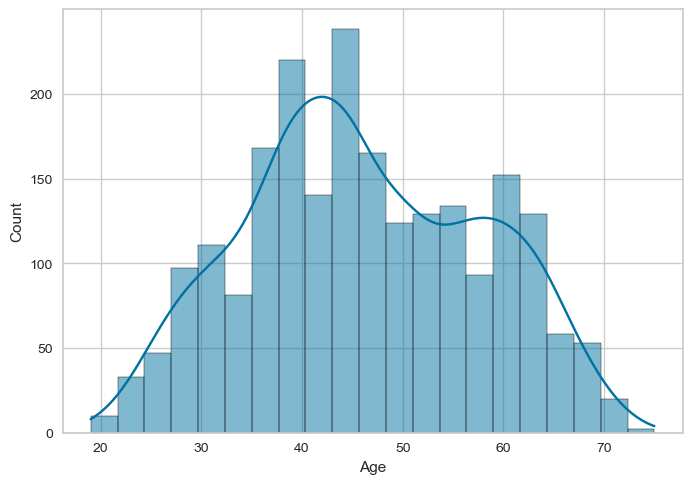

In [26]:
sns.histplot(df['Age'],kde = True)

In [27]:
df.loc[df['Age']<=19, "AgeGroup"]= "Teen"
df.loc[(df['Age']>=20) & (df['Age']<39),"AgeGroup"] = "Adults"
df.loc[(df['Age']>=40) & (df['Age']<=59),"AgeGroup"]= "MIddle Age Adults"
df.loc[(df['Age']>=60), "AgeGroup"] ="Seniors"

In [28]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,TotalSpend,AgeGroup
0,Graduation,Single,58138.0,2012-09-04,58,3,8,10,4,7,...,0,0,0,3,11,1,0,58,1617,MIddle Age Adults
1,Graduation,Single,46344.0,2014-03-08,38,2,1,1,2,5,...,0,0,0,3,11,0,2,61,27,Seniors
2,Graduation,Married,71613.0,2013-08-21,26,1,8,2,10,4,...,0,0,0,3,11,0,0,50,776,MIddle Age Adults
3,Graduation,Married,26646.0,2014-02-10,26,2,2,0,4,6,...,0,0,0,3,11,0,1,31,53,Adults
4,PhD,Married,58293.0,2014-01-19,94,5,5,3,6,5,...,0,0,0,3,11,0,1,34,422,Adults


In [29]:
# Convert to datetime
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [30]:
# Month Enrollment 
df['MonthEnrollement'] = (2015 -df.Dt_Customer.dt.year)*12 + (1-df.Dt_Customer.dt.month)
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,TotalSpend,AgeGroup,MonthEnrollement
0,Graduation,Single,58138.0,2012-09-04,58,3,8,10,4,7,...,0,0,3,11,1,0,58,1617,MIddle Age Adults,28
1,Graduation,Single,46344.0,2014-03-08,38,2,1,1,2,5,...,0,0,3,11,0,2,61,27,Seniors,10
2,Graduation,Married,71613.0,2013-08-21,26,1,8,2,10,4,...,0,0,3,11,0,0,50,776,MIddle Age Adults,17
3,Graduation,Married,26646.0,2014-02-10,26,2,2,0,4,6,...,0,0,3,11,0,1,31,53,Adults,11
4,PhD,Married,58293.0,2014-01-19,94,5,5,3,6,5,...,0,0,3,11,0,1,34,422,Adults,12


In [31]:
marital_group = df.groupby("Marital_Status").agg( 
    TotalRecords = ("Marital_Status", "size"),
    TotalAmount = ("TotalSpend", "sum"),
    AvgAmount = ("TotalSpend", "mean")
   )

marital_group

,TotalRecords,TotalAmount,AvgAmount
Marital_Status,,,
Married,1422,848610,596.772152
Single,782,489155,625.517903


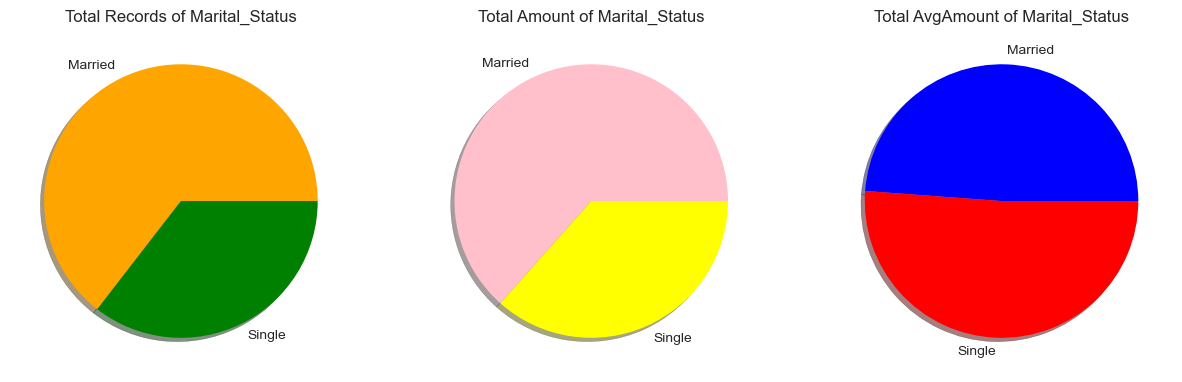

In [32]:
plt.figure(figsize= (15,10))

plt.subplot(1,3,1)
plt.pie(x = marital_group.TotalRecords, labels= marital_group.index, colors= ['orange', 'green'], shadow= True)
plt.title(f"Total Records of {marital_group.index.name}")


plt.subplot(1,3,2)
plt.pie(x = marital_group.TotalAmount, labels= marital_group.index, colors= ['pink', 'yellow'], shadow= True)
plt.title(f"Total Amount of {marital_group.index.name}")


plt.subplot(1,3,3)
plt.pie(x = marital_group.AvgAmount, labels= marital_group.index, colors= ['blue', 'red'], shadow= True)
plt.title(f"Total AvgAmount of {marital_group.index.name}")


plt.show()

In [33]:
age_group = df.groupby("AgeGroup").agg( 
    TotalRecords = ("AgeGroup", "size"),
    TotalAmount = ("TotalSpend", "sum"),
    AvgAmount = ("TotalSpend", "mean")
   )

age_group

,TotalRecords,TotalAmount,AvgAmount
AgeGroup,,,
Adults,595,323151,543.110924
MIddle Age Adults,1160,700998,604.308621
Seniors,359,268435,747.729805
Teen,2,138,69.000000


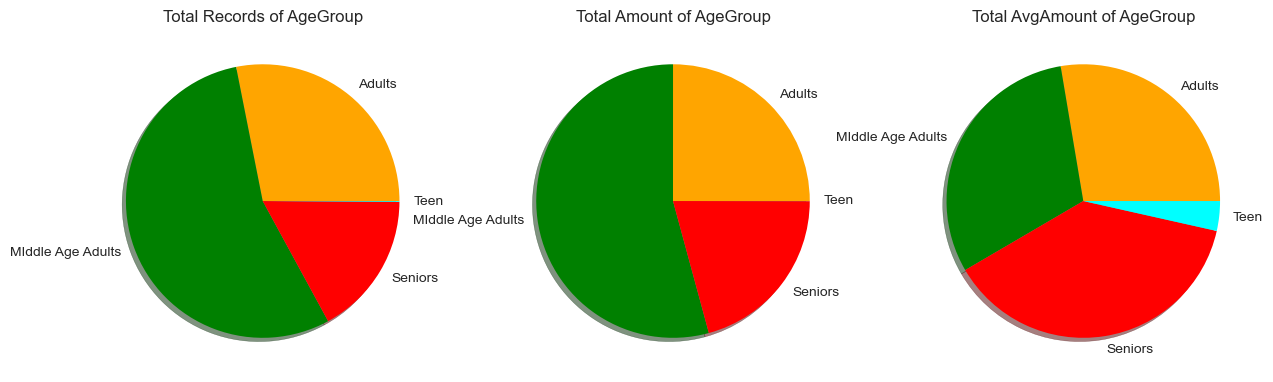

In [34]:
plt.figure(figsize= (15,10))

plt.subplot(1,3,1)
plt.pie(x = age_group.TotalRecords, labels= age_group.index, colors= ['orange', 'green', 'red', 'cyan'], shadow= True)
plt.title(f"Total Records of {age_group.index.name}")


plt.subplot(1,3,2)
plt.pie(x = age_group.TotalAmount, labels= age_group.index, colors= ['orange', 'green', 'red', 'cyan'], shadow= True)
plt.title(f"Total Amount of {age_group.index.name}")


plt.subplot(1,3,3)
plt.pie(x = age_group.AvgAmount, labels= age_group.index, colors= ['orange', 'green', 'red', 'cyan'], shadow= True)
plt.title(f"Total AvgAmount of {age_group.index.name}")

plt.show()

In [35]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Children', 'Age',
       'TotalSpend', 'AgeGroup', 'MonthEnrollement'],
      dtype='object')

In [36]:
final_df = df.drop(
    [
       'Education', 'Marital_Status', 'Dt_Customer',
       'NumDealsPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','NumWebPurchases',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
        'AgeGroup',
    ],
    
    axis = 1
)

In [37]:
final_df.head()

,Income,Recency,Children,Age,TotalSpend,MonthEnrollement
0,58138.0,58,0,58,1617,28
1,46344.0,38,2,61,27,10
2,71613.0,26,0,50,776,17
3,26646.0,26,1,31,53,11
4,58293.0,94,1,34,422,12


In [38]:
model= KMeans()
model.fit(final_df)

KMeans()

In [39]:
model.labels_

array([0, 3, 7, ..., 0, 7, 0])

In [40]:
clusterRange = range(2,21)
inertiaRange = []
silhouterange = []

for m in clusterRange:
    model_m = KMeans(n_clusters=m)
    model_m.fit(final_df)
    inertiaRange.append(model_m.inertia_)
    silhouterange.append(metrics.silhouette_score(final_df, model_m.labels_))


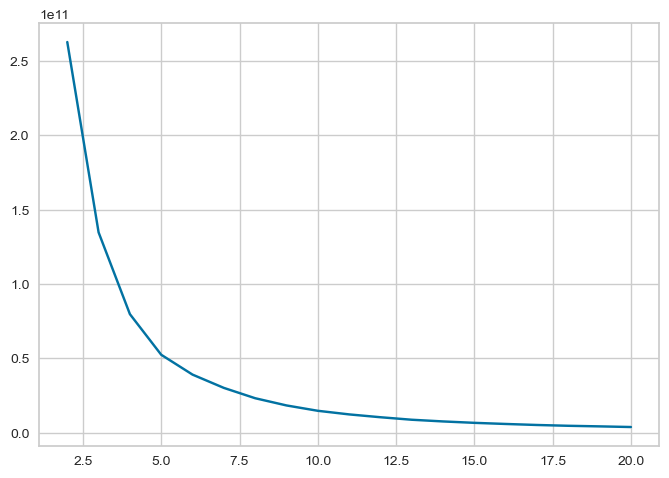

In [41]:
plt.plot(clusterRange, inertiaRange)

In [42]:
print(list(clusterRange))
print("\n")
print(inertiaRange)
print("\n")
print(silhouterange)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


[262862342874.32416, 134839362733.51944, 79835523717.70381, 52516997765.6968, 39163676059.92831, 30229594633.751583, 23282178472.634003, 18430262918.140556, 14828852029.276743, 12403840009.719679, 10495784635.502993, 8808969485.083769, 7667159846.192146, 6723533454.764336, 5968299240.283578, 5281260977.185162, 4741360173.636223, 4346423487.415918, 3907388064.408181]


[0.6113220032279282, 0.549497888859743, 0.5371266744796398, 0.5380113366013147, 0.5210267516620961, 0.5126574981698953, 0.5196020434350958, 0.5195504006590946, 0.5229425405396648, 0.5221150365347121, 0.52070921090236, 0.5235318190875742, 0.5177131776943663, 0.5180823055581285, 0.5189086429911131, 0.5204182243765035, 0.520719660183024, 0.5164916370046094, 0.5149422509990964]


In [43]:
model = KMeans(n_clusters=4)
model.fit(final_df)

KMeans(n_clusters=4)

In [44]:
prediction = pd.DataFrame( model.labels_, columns= ['labels'])


In [45]:
prediction.head()

,labels
0,0
1,3
2,2
3,1
4,0


In [79]:
test = [545.0,58,58,1617,0,33]

In [80]:
model.predict([test])

array([1])

In [87]:
final_df

,Income,Recency,Children,Age,TotalSpend,MonthEnrollement,Clusters
0,58138.0,58,0,58,1617,28,3
1,46344.0,38,2,61,27,10,1
2,71613.0,26,0,50,776,17,3
3,26646.0,26,1,31,53,11,2
4,58293.0,94,1,34,422,12,3
...,...,...,...,...,...,...,...
2235,61223.0,46,1,48,1341,19,3
2236,64014.0,56,3,69,444,7,3
2237,56981.0,91,0,34,1241,12,3
2238,69245.0,8,1,59,843,12,3


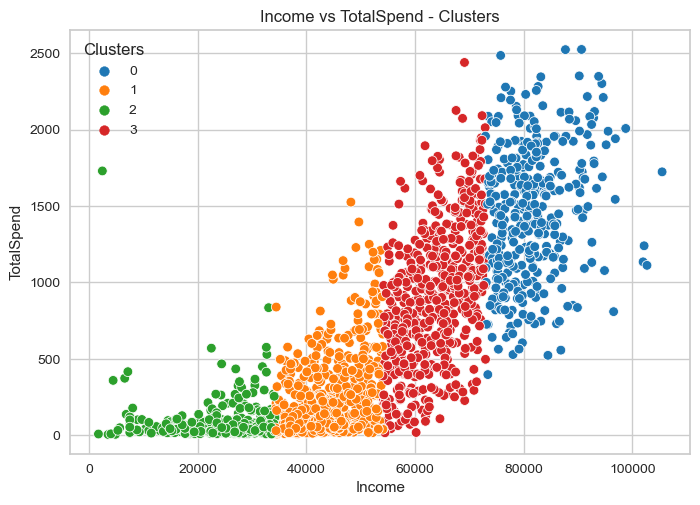

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df, x='Income', y='TotalSpend', hue='Clusters', palette='tab10')
plt.title('Income vs TotalSpend - Clusters')
plt.xlabel('Income')
plt.ylabel('TotalSpend')
plt.show()

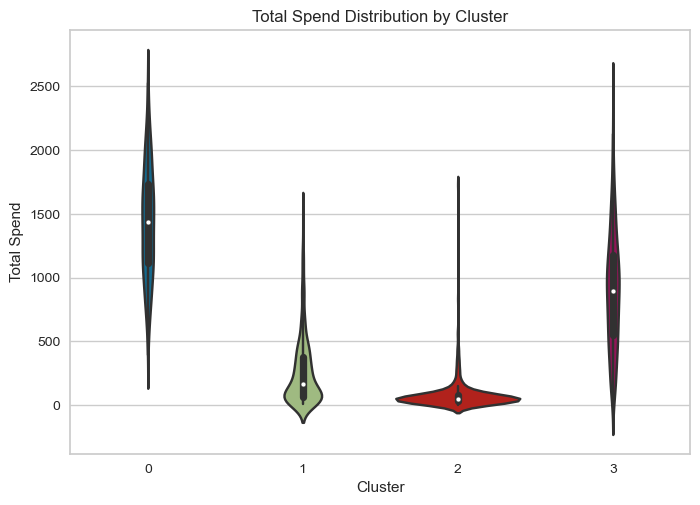

In [95]:
sns.violinplot(data=final_df, x='Clusters', y='TotalSpend')
plt.title('Total Spend Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Spend')
plt.show()


In [102]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 28BF-16EF

 Directory of C:\Users\samar\PycharmProjects\Customer Personality Analysis

08-06-2023  10:30    <DIR>          .
03-06-2023  18:53    <DIR>          ..
01-06-2023  10:08                 5 .gitignore
08-06-2023  09:04    <DIR>          .idea
02-06-2023  11:04    <DIR>          .ipynb_checkpoints
08-06-2023  09:51             1,768 application.py
08-06-2023  09:02    <DIR>          artifact
08-06-2023  10:30         2,482,755 CPA EDA.ipynb
08-06-2023  08:47    <DIR>          Customer
29-05-2023  14:43           220,188 customer_data.csv
08-06-2023  09:03               616 dump_data.py
08-06-2023  09:51    <DIR>          logs
01-06-2023  09:54                33 README.md
02-06-2023  10:15               110 requirements.txt
29-05-2023  19:18               737 setup.py
02-06-2023  10:13    <DIR>          templates
02-06-2023  10:34             1,719 templates.py
               9 File(s)      2,707,931 bytes
               8 

### Cluster Modelling using Affinity Clustering Model
Affinity Propagation involves finding a set of exemplars that best summarize the data.

It is implemented via the AffinityPropagation class and the main configuration to tune is the “damping” set between 0.5 and 1, and perhaps “preference.”

In [48]:
from sklearn.cluster import AffinityPropagation
#Initiating the Affinity Clustering model 
AP = AffinityPropagation(damping=0.9)
# fit model and predict clusters
AP_df = AP.fit_predict(final_df)
final_df["Clusters"] = AP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= AP_df

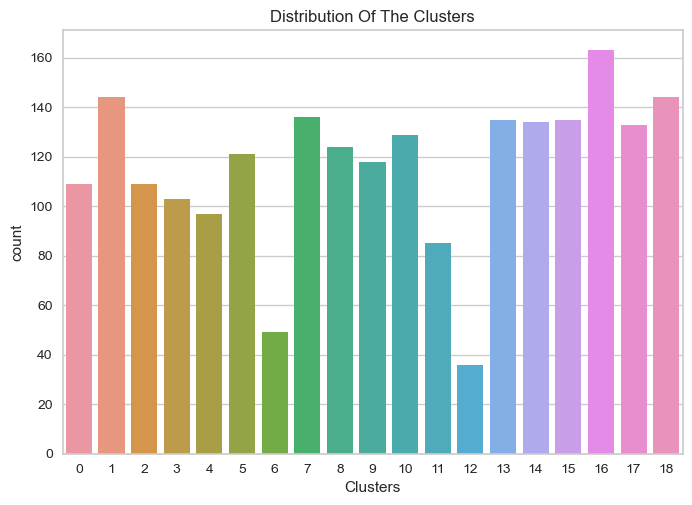

In [49]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

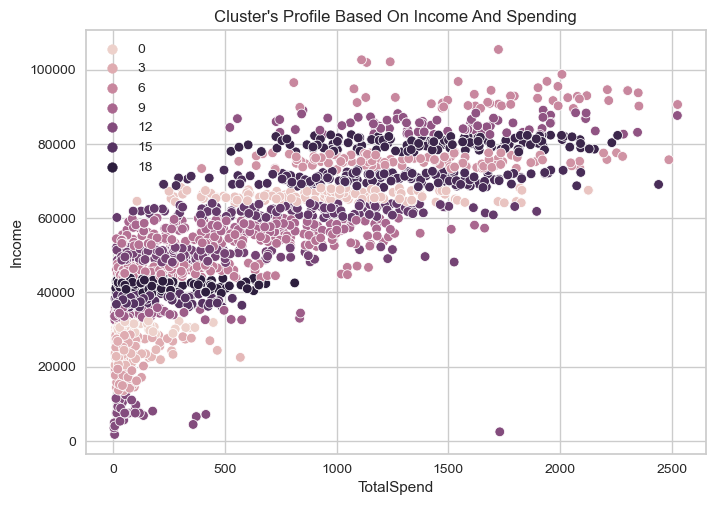

In [52]:
pl = sns.scatterplot(data = df,x=df["TotalSpend"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

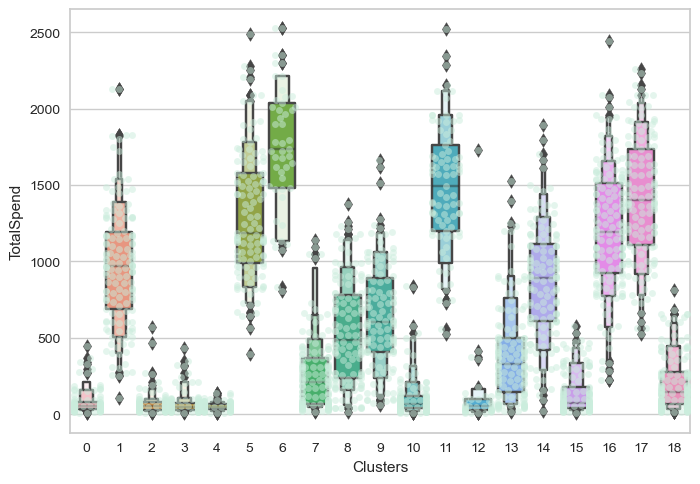

In [54]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["TotalSpend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["TotalSpend"])
plt.show()

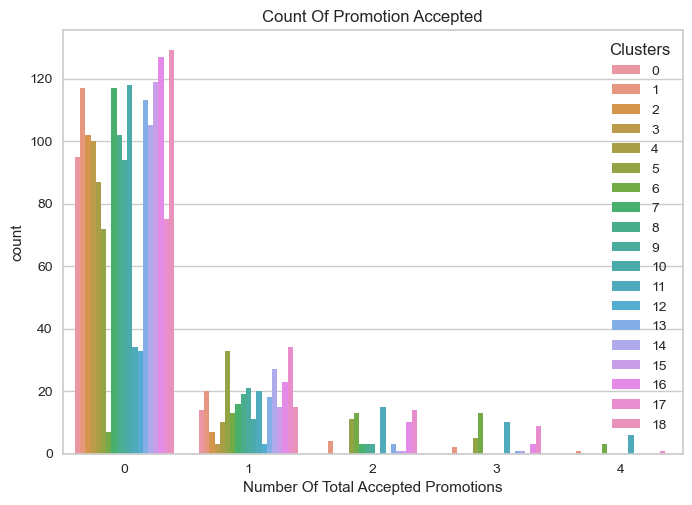

In [55]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

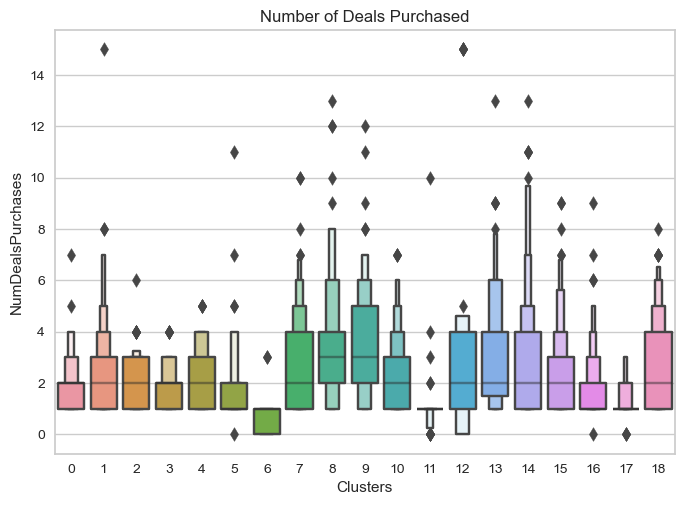

In [56]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

### BIRCH
BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

It is implemented via the Birch class and the main configuration to tune is the “threshold” and “n_clusters” hyperparameters, the latter of which provides an estimate of the number of clusters

In [57]:
from sklearn.cluster import Birch
#Initiating the Birch Clustering model 
BP = Birch(threshold=0.01, n_clusters=4)
# fit model and predict clusters
BP_df = BP.fit_predict(final_df)
final_df["Clusters"] = BP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= BP_df

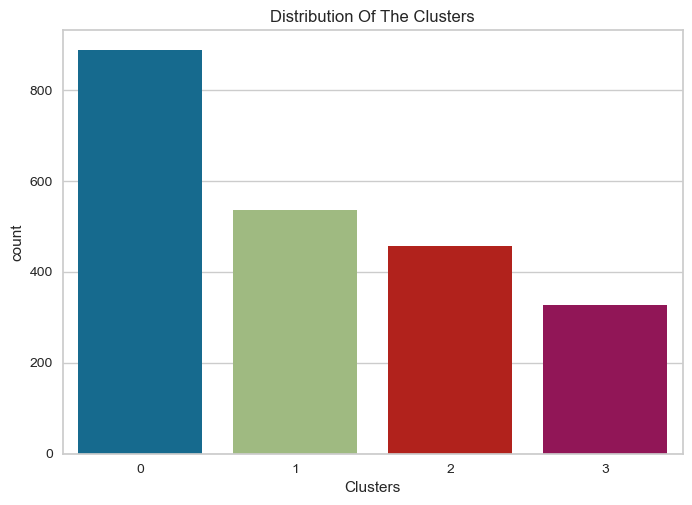

In [58]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

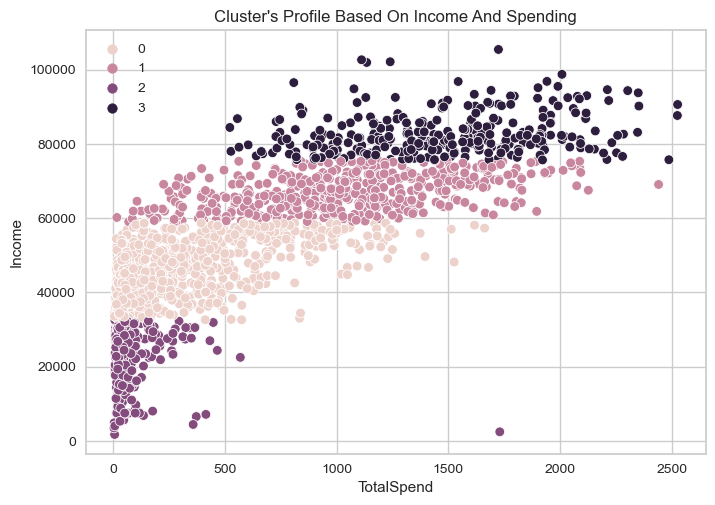

In [60]:
pl = sns.scatterplot(data = df,x=df["TotalSpend"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

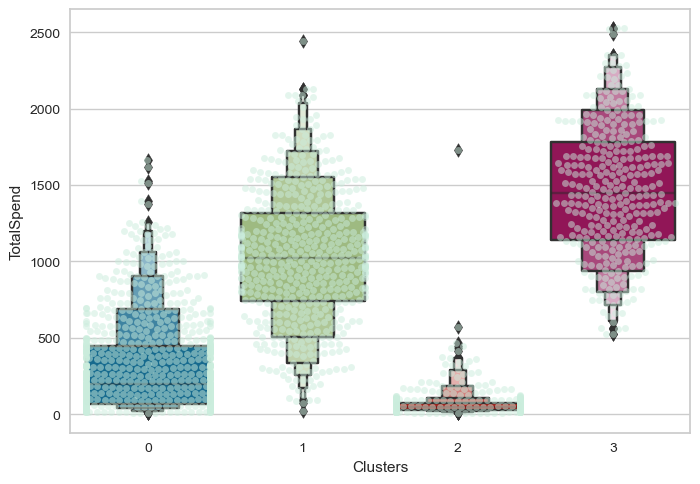

In [62]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["TotalSpend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["TotalSpend"])
plt.show()

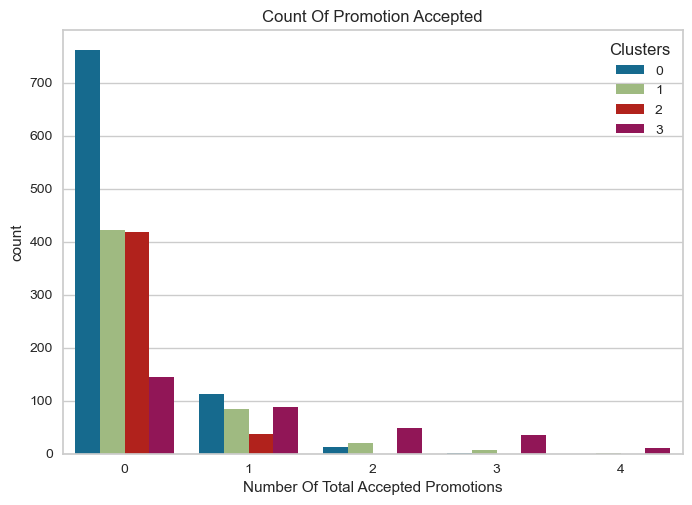

In [63]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

### DBSCAN
DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

In [64]:
from sklearn.cluster import DBSCAN
#Initiating the BBSCAN Clustering model 
DP = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
DP_df = DP.fit_predict(final_df)
final_df["Clusters"] = DP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= DP_df

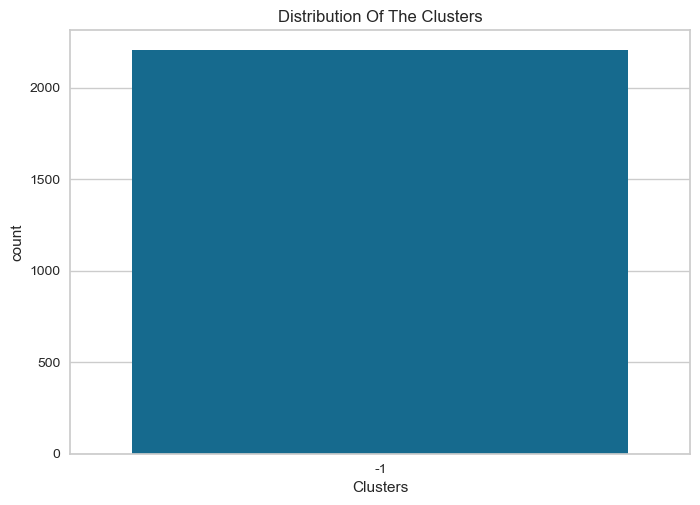

In [65]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

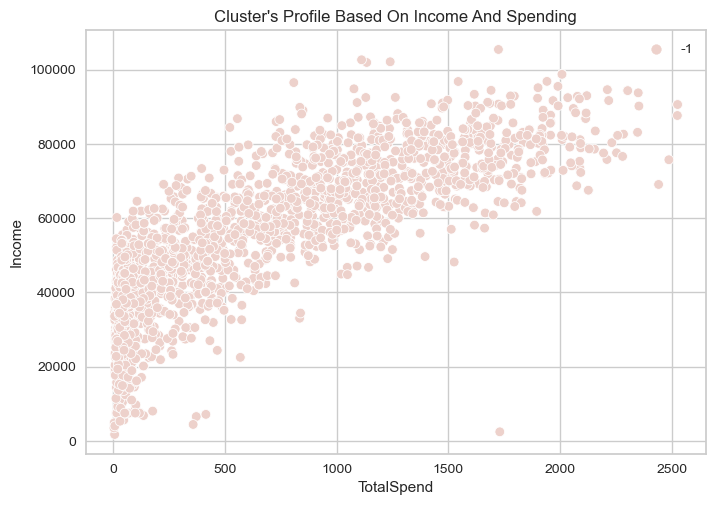

In [67]:
pl = sns.scatterplot(data = df,x=df["TotalSpend"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

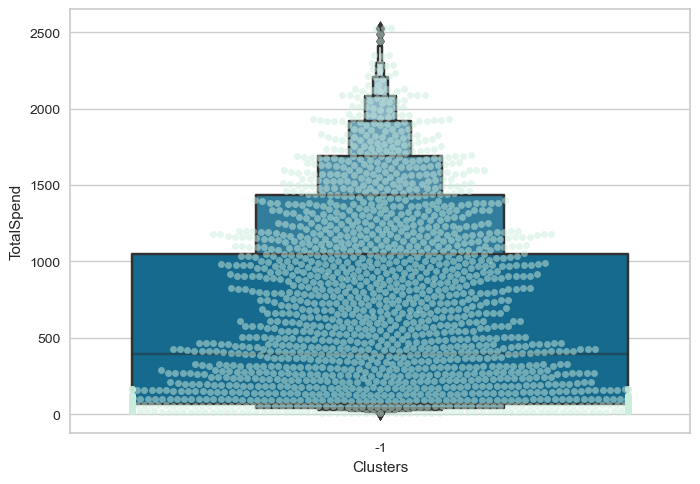

In [69]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["TotalSpend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["TotalSpend"])
plt.show()

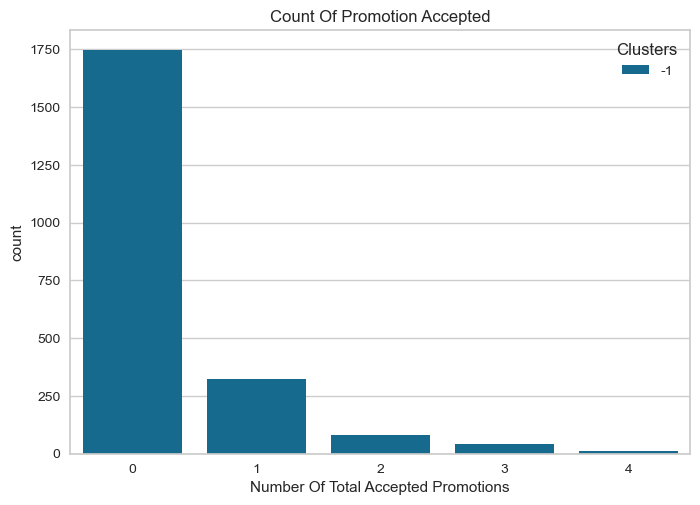

In [70]:

#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

#### Mini-Batch K-Means
Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

It is implemented via the MiniBatchKMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

In [71]:
from sklearn.cluster import MiniBatchKMeans
#Initiating the MiniBatchKMeans Clustering model 
MP = MiniBatchKMeans(n_clusters=4)
# fit model and predict clusters
MP_df = MP.fit_predict(final_df)
final_df["Clusters"] = MP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= MP_df

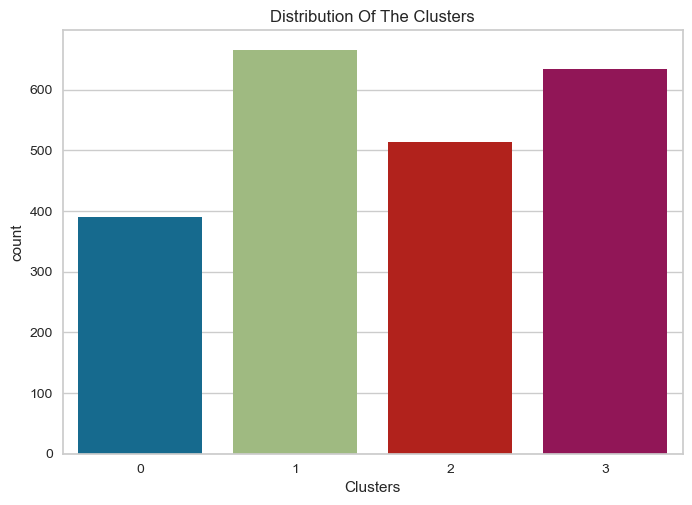

In [72]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

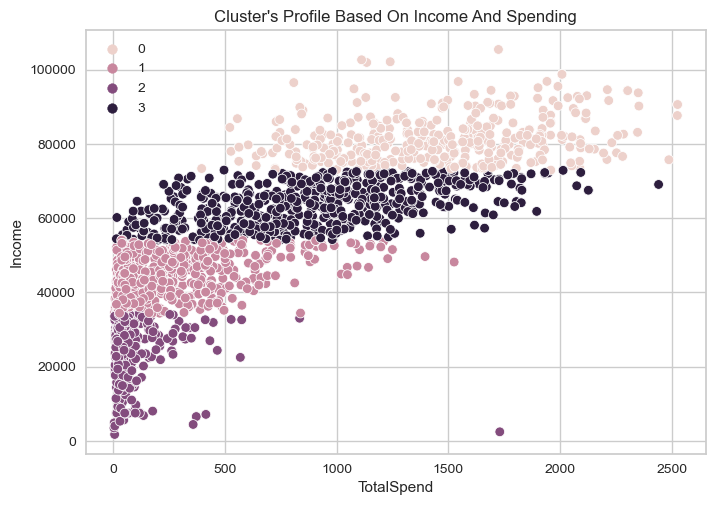

In [74]:
pl = sns.scatterplot(data = df,x=df["TotalSpend"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

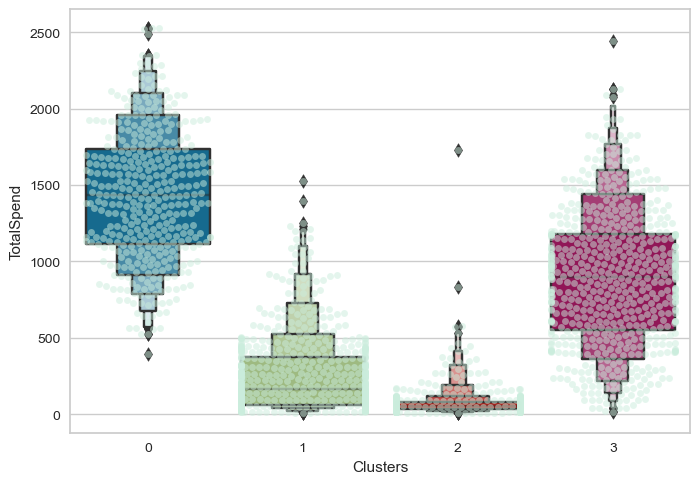

In [76]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["TotalSpend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["TotalSpend"])
plt.show()


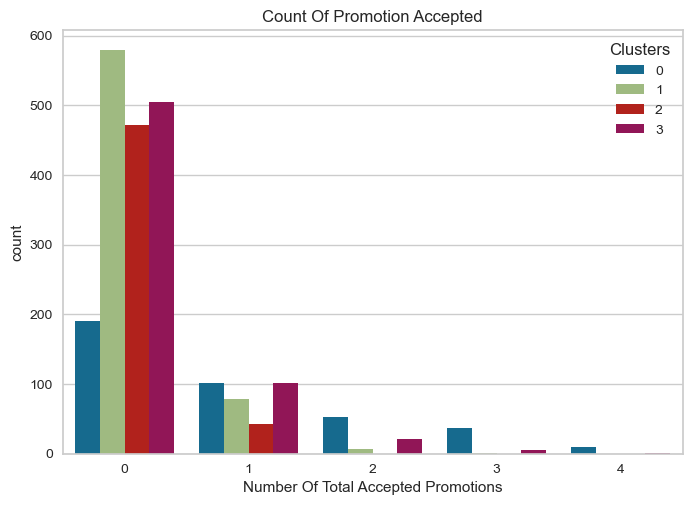

In [77]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

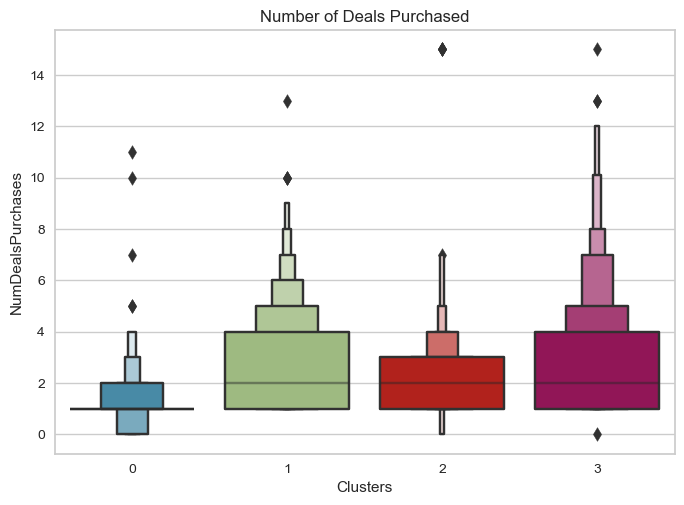

In [78]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()
